In [ ]:
# Restart the runtime after running this once
!pip install --upgrade pip
!pip install numpy==1.24.4  # Downgrade numpy to avoid conflicts
!pip install u8darts[all] --no-deps

In [ ]:
!pip install "u8darts[all]==0.34.0" --no-cache-dir --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.2/981.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 403.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 328.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 169.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 209.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 211.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 272.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 152.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Necessary imports to read the datasets
import pandas as pd
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_consumption_by_id(dataframe, id_value, column='Accumulated consumption (L/day)'):
    """
    Plots a time series of accumulated consumption for a given ID.

    Parameters:
    - dataframe: the input DataFrame
    - id_value: the specific ID to filter and plot
    - column: the name of the column to plot (default is 'Accumulated consumption (L/day)')
    """
    ts = dataframe[dataframe['id'] == id_value].sort_values('Date')

    if ts.empty:
        print(f"No data found for ID: {id_value}")
        return

    plt.figure(figsize=(12, 4))
    plt.plot(ts['Date'], ts[column], linestyle='-', linewidth=1.2)
    plt.title(f"{column} for: {id_value}")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Google Colab
file_path = "/content/drive/MyDrive/Colab Notebooks/TFG/data/01_datasets/df_domestic_cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

# Notebook
# df = pd.read_csv("../data/datasets/01_cleaned_daily/df_domestic.csv", low_memory=False)

In [ ]:
df

id  District        Date       Use  \
0        0801501001_Badalona         1  2022-01-01  Domestic   
1        0801501001_Badalona         1  2022-01-02  Domestic   
2        0801501001_Badalona         1  2022-01-03  Domestic   
3        0801501001_Badalona         1  2022-01-04  Domestic   
4        0801501001_Badalona         1  2022-01-05  Domestic   
...                      ...       ...         ...       ...   
938775  0820506001_Barcelona         6  2023-12-27  Domestic   
938776  0820506001_Barcelona         6  2023-12-28  Domestic   
938777  0820506001_Barcelona         6  2023-12-29  Domestic   
938778  0820506001_Barcelona         6  2023-12-30  Domestic   
938779  0820506001_Barcelona         6  2023-12-31  Domestic   

        Number of meters  Accumulated consumption (L/day)  \
0                    250                            16242   
1                    251                            17477   
2                    251                            16540   
3                    251                            17153   
4                    251                            18619   
...                  ...                              ...   
938775                10                             1252   
938776                10                             1003   
938777                10                             1336   
938778                10                              742   
938779                10                             1040   

        Consumption per meter  
0                       64.97  
1                       69.63  
2                       65.90  
3                       68.34  
4                       74.18  
...                       ...  
938775                 125.20  
938776                 100.30  
938777                 133.60  
938778                  74.20  
938779                 104.00  

[938780 rows x 7 columns]

In [ ]:
# List of unique ides
unique_ids = df['id'].unique().tolist()
print(len(unique_ids))


1286


0801909015_Barcelona


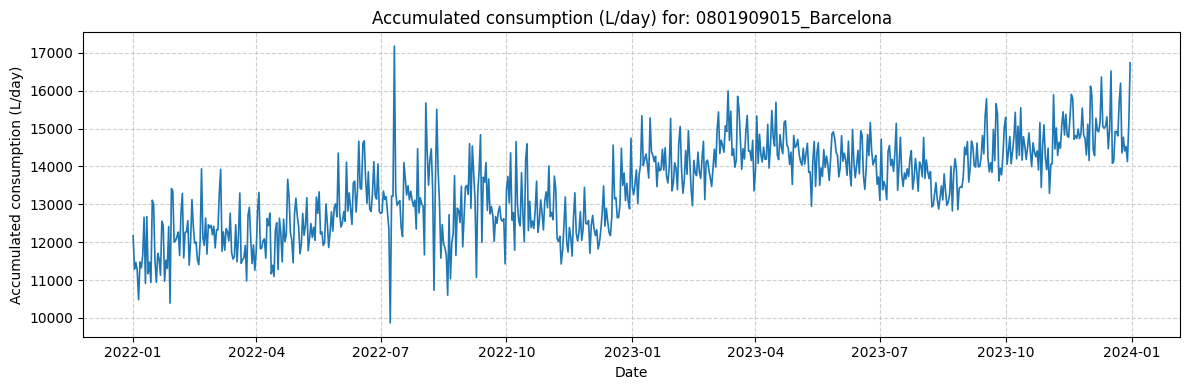

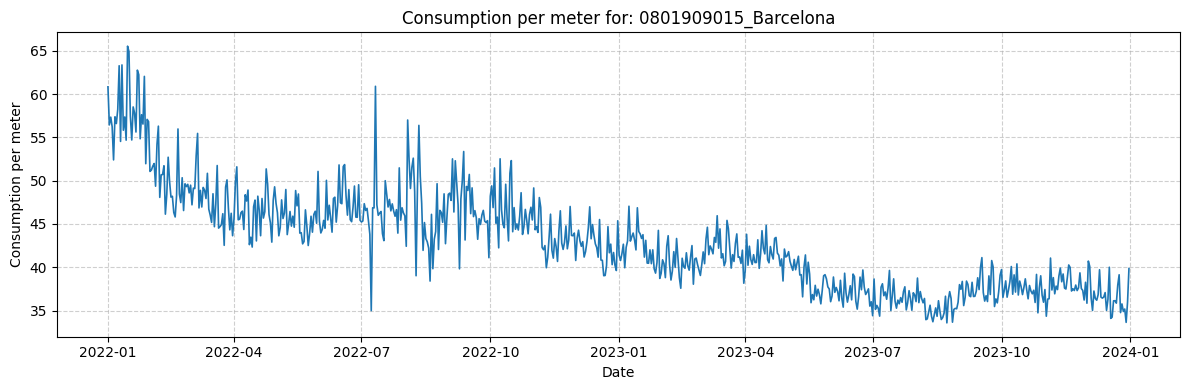

In [ ]:
import random

# We select a random id
random_id = random.choice(df['id'].unique().tolist())
print(random_id)

# We make sure we have the data in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['id', 'Date'])

# We print the time serie
plot_consumption_by_id(df,random_id)

# Normalised time serie
plot_consumption_by_id(df, random_id, column='Consumption per meter')

The id with the highest increase in the number of meters is: 0801503013_Badalona
Increase in number of meters: 777


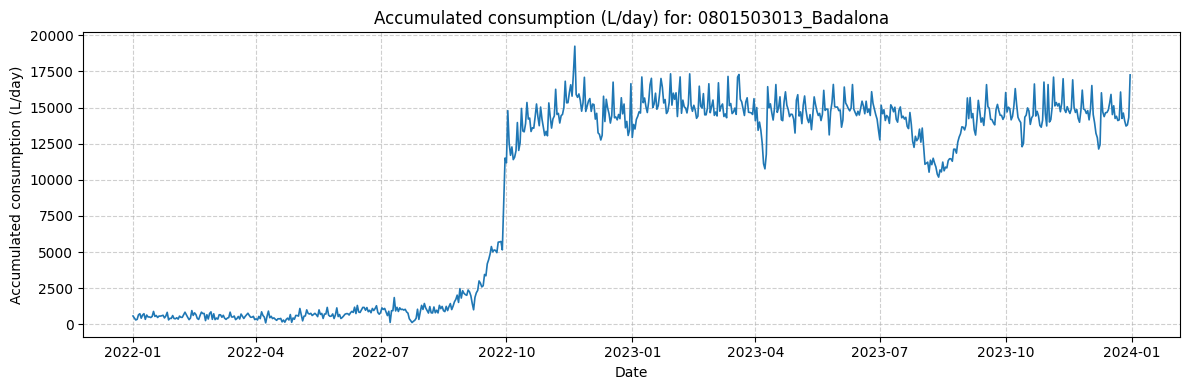

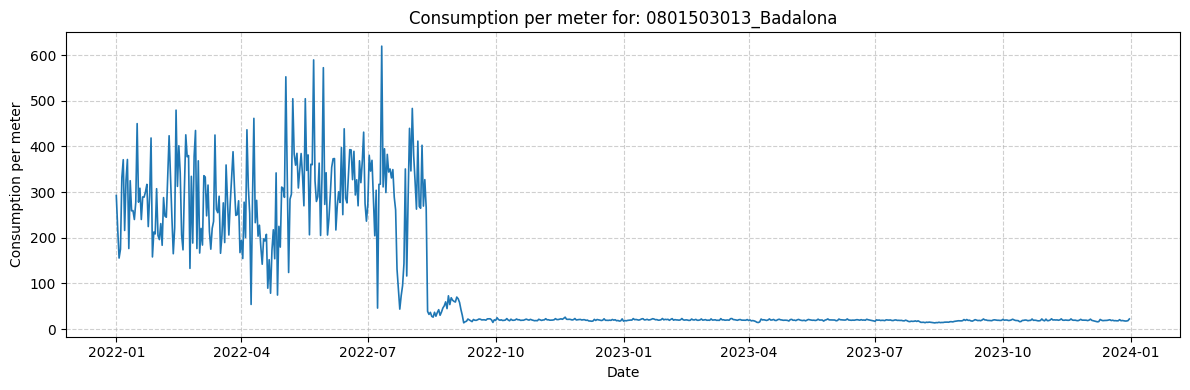

In [ ]:
# We the first and last "Number of meters" for each id
first_meters = df.groupby('id').first()['Number of meters']
last_meters = df.groupby('id').last()['Number of meters']

# Compute the difference in number of meters
increase = last_meters - first_meters

# Find the id with the maximum increase
max_increase_id = increase.idxmax()
max_increase_value = increase.max()

print(f"The id with the highest increase in the number of meters is: {max_increase_id}")
print(f"Increase in number of meters: {max_increase_value}")

# Let's print the time serie with the most increased number of meters
plot_consumption_by_id(df, max_increase_id)
plot_consumption_by_id(df, max_increase_id, column='Consumption per meter')


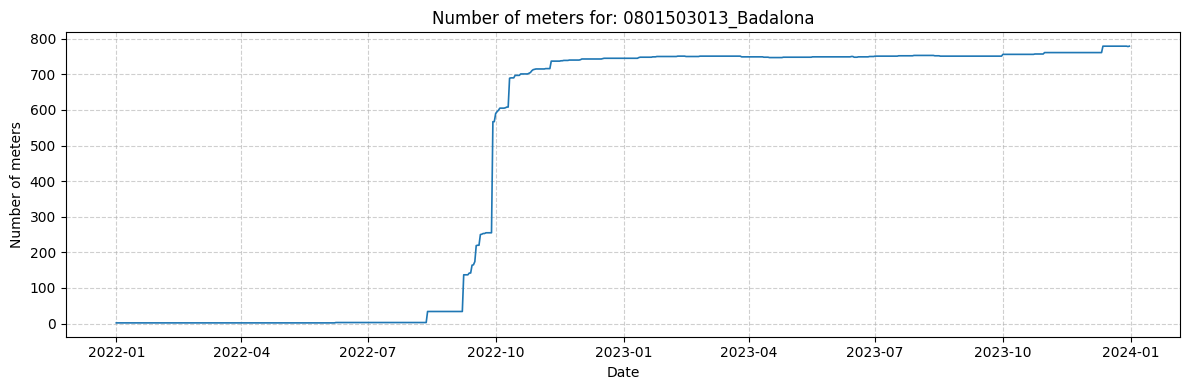

In [ ]:
# We plot the number of meters through time
ts = df[df['id'] == max_increase_id].sort_values('Date')

plt.figure(figsize=(12, 4))
plt.plot(ts['Date'], ts['Number of meters'], linestyle='-', linewidth=1.2)
plt.title(f"Number of meters for: {max_increase_id}")
plt.xlabel("Date")
plt.ylabel("Number of meters")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# We calculate the difference between consecutive days
ts['meters_diff'] = ts['Number of meters'].diff()

# We by the biggest increase
biggest_increases = ts.sort_values('meters_diff', ascending=False)

# Top 5 biggest increases
print(biggest_increases[['Date', 'Number of meters', 'meters_diff']].head(5))

            Date  Number of meters  meters_diff
16331 2022-09-29               567        312.0
16310 2022-09-08               137        103.0
16343 2022-10-11               689         81.0
16319 2022-09-17               219         45.0
16284 2022-08-13                34         31.0


In [ ]:
# Now let's plot the major difference in consumption per meter and consumption
ts['consumption_diff'] = ts['Accumulated consumption (L/day)'].diff()
ts['normalized_consumption_diff'] = ts['Consumption per meter'].diff()

# We sort by the biggest increase
biggest_increases_total = ts.sort_values('consumption_diff', ascending=False)
print(biggest_increases_total[['Date', 'Accumulated consumption (L/day)', 'consumption_diff']].head(5))


            Date  Accumulated consumption (L/day)  consumption_diff
16524 2023-04-10                            16442            4679.0
16334 2022-10-02                            14787            3607.0
16768 2023-12-10                            16020            3590.0
16332 2022-09-30                            11506            3232.0
16424 2022-12-31                            16650            3210.0


In [ ]:
# Now let's check the behaviour of the 25 time series with the most increased number of meters
# We get the first and last "Number of meters" for each id
first_meters = df.groupby('id').first()['Number of meters']
last_meters = df.groupby('id').last()['Number of meters']

# We compute the difference
increase = last_meters - first_meters

# Get the top 25 ids with the highest increase
top_25_increase = increase.sort_values(ascending=False).head(25)

print("Top 25 IDs with the highest increase in the number of meters:")
print(top_25_increase)

# We each of the top 25 time series
for idx in top_25_increase.index:
    print(f"\nPlotting for id: {idx} (Increase: {top_25_increase[idx]})")
    plot_consumption_by_id(df, idx)
    plot_consumption_by_id(df, idx, column='Consumption per meter')


Output hidden; open in https://colab.research.google.com to view.

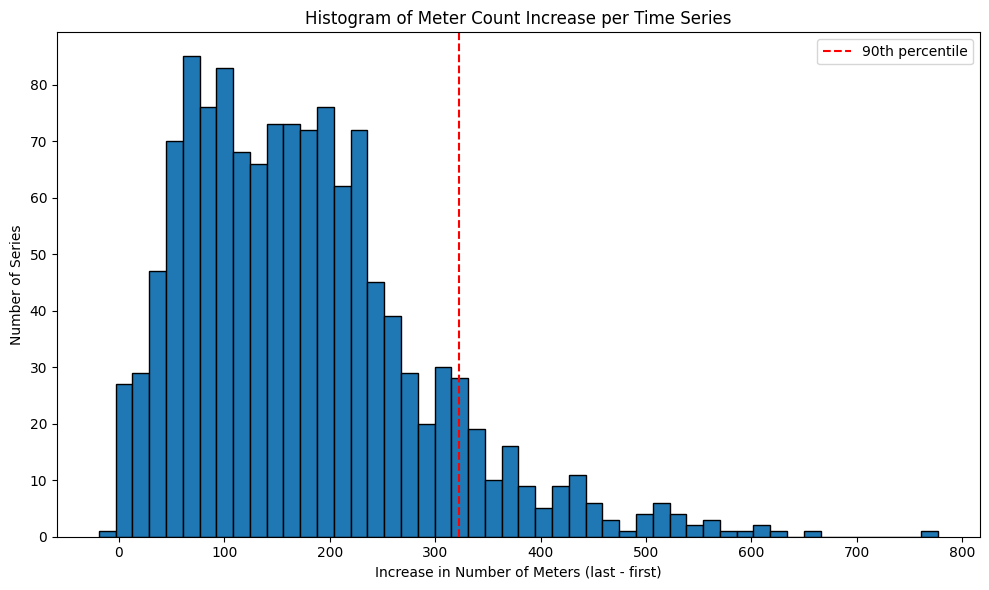

In [ ]:
# Calculate increase again
first_meters = df.groupby('id').first()['Number of meters']
last_meters = df.groupby('id').last()['Number of meters']
increase = last_meters - first_meters

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(increase, bins=50, edgecolor='black')
plt.axvline(x=np.percentile(increase, 90), color='red', linestyle='--', label='90th percentile')
plt.title("Histogram of Meter Count Increase per Time Series")
plt.xlabel("Increase in Number of Meters (last - first)")
plt.ylabel("Number of Series")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# We sort by increase of meters and we cut off the top 10% most increased counters
increase_sorted = increase.sort_values(ascending=False)
cutoff_index = int(len(increase_sorted) * 0.1)
top_10_ids = increase_sorted[:cutoff_index].index

# We create a new df
df_cleaned1 = df[~df['id'].isin(top_10_ids)].copy()
df_cleaned1['Date'] = pd.to_datetime(df_cleaned1['Date'])
df_cleaned1 = df_cleaned1.sort_values(['id', 'Date'])



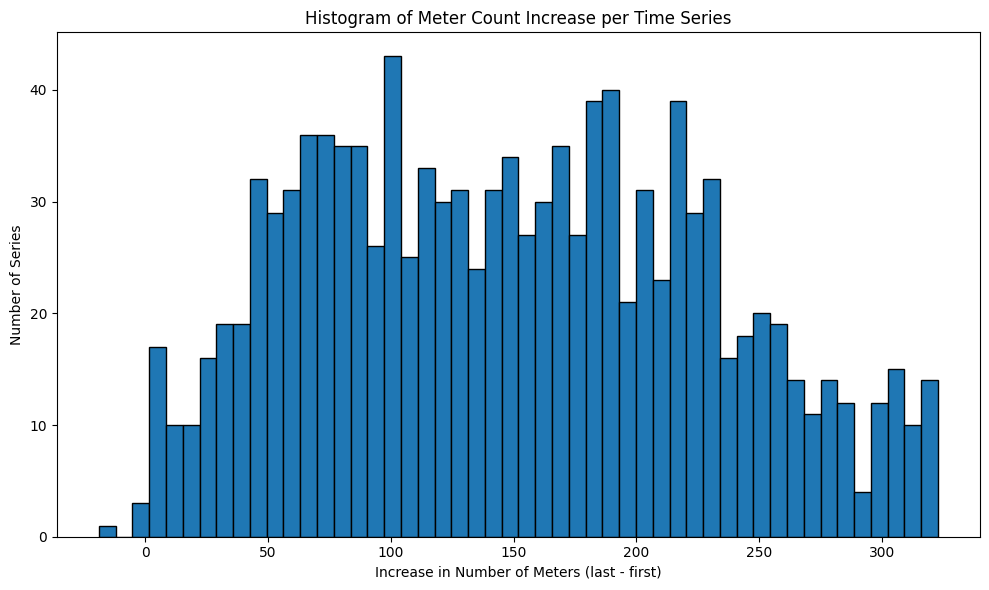

In [ ]:
# We plot the resulting distribution
first_meters = df_cleaned1.groupby('id').first()['Number of meters']
last_meters = df_cleaned1.groupby('id').last()['Number of meters']
increase = last_meters - first_meters

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(increase, bins=50, edgecolor='black')
plt.title("Histogram of Meter Count Increase per Time Series")
plt.xlabel("Increase in Number of Meters (last - first)")
plt.ylabel("Number of Series")
plt.tight_layout()
plt.show()

In [ ]:
################################# 2nd step ##########################################

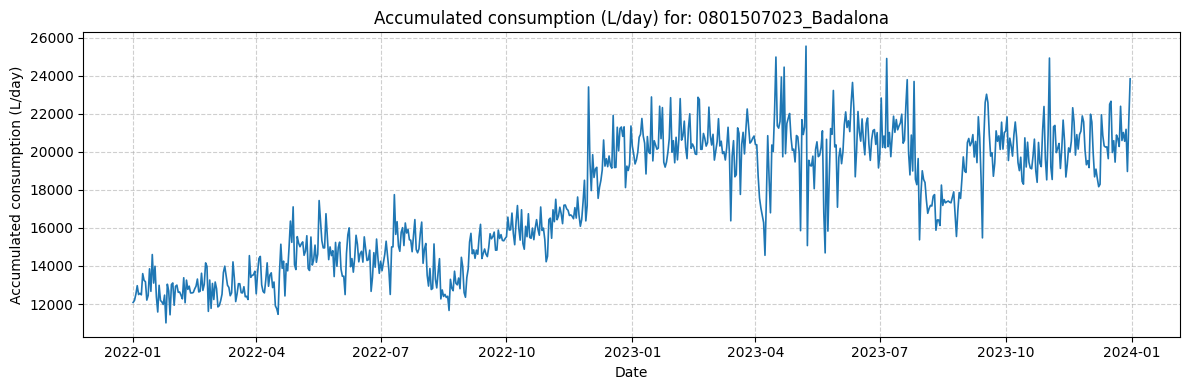

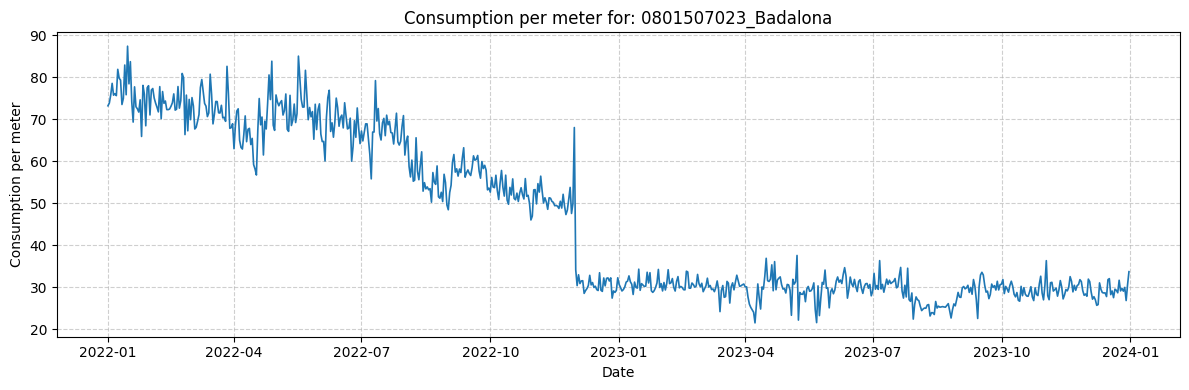

In [ ]:
# Now we want to get rid of the time series like this, where in the middle of the time series they lose they pattern because of a sudden increase of the number of meters
id = "0801507023_Badalona"
plot_consumption_by_id(df, id)
plot_consumption_by_id(df, id, column='Consumption per meter')


In [ ]:
# Let's plot the time series with the least increase of the number of meters
# Get the top 25 ids with the least increase
top_25_least_increase = increase.sort_values(ascending=True).head(25)

print("Top 25 IDs with the highest increase in the number of meters:")
print(top_25_least_increase)

# Plot each of the top 25 time series
for idx in top_25_least_increase.index:
    print(f"\nPlotting for id: {idx} (Increase: {top_25_least_increase[idx]})")
    plot_consumption_by_id(df, idx)
    plot_consumption_by_id(df, idx, column='Consumption per meter')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# So let's compute the variance
def detect_flat_segments_adaptive(df, window_size=30, ratio_threshold=0.1):
    flat_series = []

    for series_id, group in df.groupby('id'):
        group = group.sort_values('Date').reset_index(drop=True)
        std = group['Consumption per meter'].std()

        # Avoid division by zero (if global_std == 0, the whole series is flat)
        if std == 0 or np.isnan(std):
            print(f"Skipping {series_id} due to zero or NaN global_std")
            continue

        # Skip if not enough data or std == 0
        if std == 0 or np.isnan(std):
            print(f"Skipping {series_id} due to zero or NaN std")
            continue

        # Rolling std on the full series
        rolling_std = group['Consumption per meter'].rolling(window=window_size).std()

        # Ratio between local std and first-3-months std
        std_ratio = rolling_std / std

        # If any window has ratio below the threshold, we mark series as flat
        if (std_ratio < ratio_threshold).any():
            flat_series.append(series_id)

    return flat_series


In [ ]:
flat_series_global = detect_flat_segments_adaptive(df_cleaned1)
print(flat_series_global)

print(f"Number of flat series: {len(flat_series_global)}")

['0801503010_Badalona', '0801504010_Badalona', '0801506002_Badalona', '0801506003_Badalona', '0801507006_Badalona', '0801507010_Badalona', '0801507021_Badalona', '0801508004_Badalona', '0801508009_Badalona', '0801508011_Badalona', '0801509005_Badalona', '0801509008_Badalona', '0801509012_Badalona', '0801509013_Badalona', '0801509014_Badalona', '0801509017_Badalona', '0801509019_Badalona', '0801509020_Badalona', '0801509025_Badalona', '0801509026_Badalona', '0801509035_Badalona', '0801509037_Badalona', '0801509052_Badalona', '0801509054_Badalona', '0801509057_Badalona', '0801901019_Barcelona', '0801901055_Barcelona', '0801902014_Barcelona', '0801902048_Barcelona', '0801902058_Barcelona', '0801902070_Barcelona', '0801902077_Barcelona', '0801902096_Barcelona', '0801902114_Barcelona', '0801902117_Barcelona', '0801902134_Barcelona', '0801902136_Barcelona', '0801902137_Barcelona', '0801902138_Barcelona', '0801902142_Barcelona', '0801902150_Barcelona', '0801902152_Barcelona', '0801902153_Barc

In [ ]:
for id in flat_series_global:
    plot_consumption_by_id(df, id)
    plot_consumption_by_id(df, id, column='Consumption per meter')

Output hidden; open in https://colab.research.google.com to view.

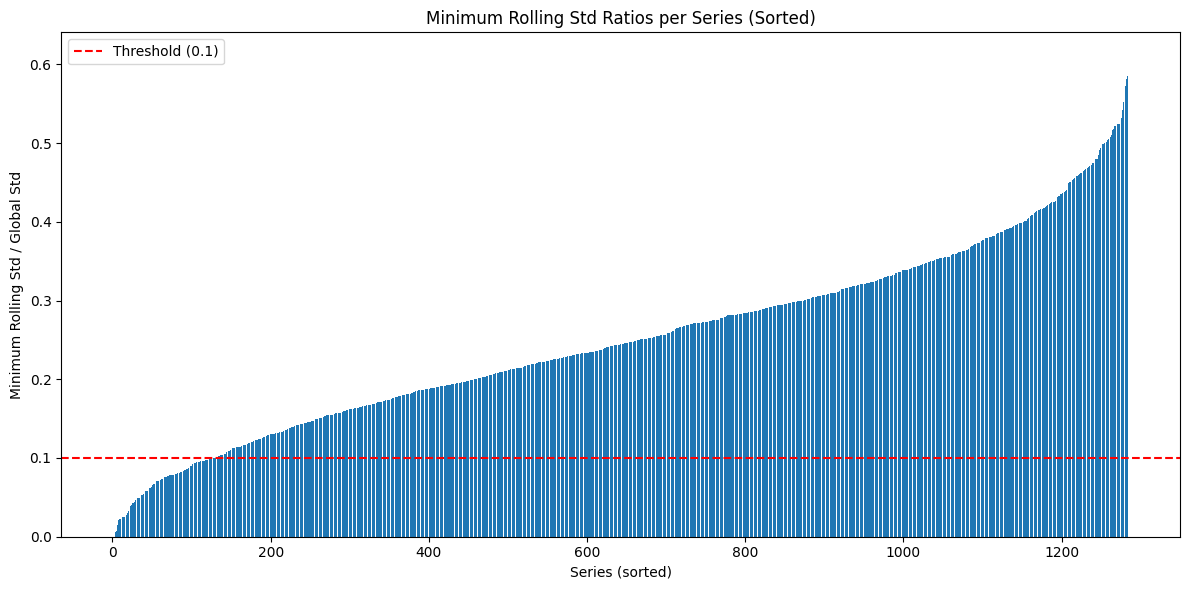

In [ ]:
def plot_min_std_ratios(df, window_size=30):
    min_ratios = []
    series_ids = []

    for series_id, group in df.groupby('id'):
        group = group.sort_values('Date').reset_index(drop=True)
        global_std = group['Consumption per meter'].std()

        # Skip if std is zero or NaN
        if global_std == 0 or np.isnan(global_std):
            continue

        # Compute rolling std and ratio
        rolling_std = group['Consumption per meter'].rolling(window=window_size).std()
        std_ratio = rolling_std / global_std

        # Minimum ratio (ignoring NaNs)
        min_ratio = std_ratio.min()
        min_ratios.append(min_ratio)
        series_ids.append(series_id)

    # Create DataFrame and sort by min_ratio
    ratios_df = pd.DataFrame({'series_id': series_ids, 'min_std_ratio': min_ratios})
    ratios_df = ratios_df.sort_values('min_std_ratio').reset_index(drop=True)

    # Plot sorted values
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(ratios_df)), ratios_df['min_std_ratio'])
    plt.axhline(0.1, color='red', linestyle='--', label='Threshold (0.1)')
    plt.xlabel('Series (sorted)')
    plt.ylabel('Minimum Rolling Std / Global Std')
    plt.title('Minimum Rolling Std Ratios per Series (Sorted)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
plot_min_std_ratios(df)


In [ ]:
# So let's keep all time series whose id is not in flat_series_global
df_cleaned2 = df_cleaned1[~df_cleaned1['id'].isin(flat_series_global)].copy()

# We load the df and make sure it is ordered
df_cleaned2['Date'] = pd.to_datetime(df_cleaned2['Date'])
df_cleaned2 = df_cleaned2.sort_values(['id', 'Date'])

In [ ]:
df_cleaned2

id  District       Date       Use  Number of meters  \
0        0801501001_Badalona         1 2022-01-01  Domestic               250   
1        0801501001_Badalona         1 2022-01-02  Domestic               251   
2        0801501001_Badalona         1 2022-01-03  Domestic               251   
3        0801501001_Badalona         1 2022-01-04  Domestic               251   
4        0801501001_Badalona         1 2022-01-05  Domestic               251   
...                      ...       ...        ...       ...               ...   
938775  0820506001_Barcelona         6 2023-12-27  Domestic                10   
938776  0820506001_Barcelona         6 2023-12-28  Domestic                10   
938777  0820506001_Barcelona         6 2023-12-29  Domestic                10   
938778  0820506001_Barcelona         6 2023-12-30  Domestic                10   
938779  0820506001_Barcelona         6 2023-12-31  Domestic                10   

        Accumulated consumption (L/day)  Consumption per meter  
0                                 16242                  64.97  
1                                 17477                  69.63  
2                                 16540                  65.90  
3                                 17153                  68.34  
4                                 18619                  74.18  
...                                 ...                    ...  
938775                             1252                 125.20  
938776                             1003                 100.30  
938777                             1336                 133.60  
938778                              742                  74.20  
938779                             1040                 104.00  

[785480 rows x 7 columns]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

# Store results here
stationary_ids = []
non_stationary_ids = []
missing_ids = []

# We defined the period for seasonality
SEASONALITY_PERIOD = 7

# Group by series ID
for series_id, group in tqdm(df_cleaned2.groupby('id')):
    series = group.set_index('Date')['Consumption per meter'].dropna()

    if len(series) < SEASONALITY_PERIOD * 3:
        missing_ids.append(series_id)
        continue  # skip short series

    try:
        # Decompose the series to remove seasonality
        decomposition = seasonal_decompose(series, model='additive', period=SEASONALITY_PERIOD, extrapolate_trend='freq')
        resid = decomposition.resid.dropna()

        # Test if residual has stationary mean
        adf_stat, p_value, *_ = adfuller(resid)

        if p_value < 0.05:
            stationary_ids.append(series_id)
        else:
            non_stationary_ids.append(series_id)

    except Exception as e:
        missing_ids.append(series_id)


100%|██████████| 1076/1076 [00:47<00:00, 22.75it/s]


In [ ]:
print(f"Total time series: {df_cleaned2['id'].nunique()}")
print(f"Stationary in mean (after removing seasonality): {len(stationary_ids)}")
print(f"Non-stationary in mean: {len(non_stationary_ids)}")
print(f"Skipped (too short or error): {len(missing_ids)}")

Total time series: 1076
Stationary in mean (after removing seasonality): 1076
Non-stationary in mean: 0
Skipped (too short or error): 0


In [ ]:
adf_stats = {}

for series_id, group in tqdm(df_cleaned2.groupby('id')):
    series = group.set_index('Date')['Consumption per meter']

    if len(series) < SEASONALITY_PERIOD * 3:
        continue

    try:
        decomposition = seasonal_decompose(series, model='additive', period=SEASONALITY_PERIOD, extrapolate_trend='freq')
        resid = decomposition.resid.dropna()

        adf_stat, p_value, *_ = adfuller(resid)

        adf_stats[series_id] = adf_stat

    except:
        continue


100%|██████████| 1076/1076 [00:41<00:00, 25.73it/s]


In [ ]:
# Sort by ADF stat (higher = less stationary)
sorted_adf = sorted(adf_stats.items(), key=lambda x: x[1], reverse=True)
least_stationary_id, stat = sorted_adf[0]

print(f"Least stationary series ID: {least_stationary_id}")
print(f"ADF Statistic: {stat}")


Least stationary series ID: 0801901022_Barcelona
ADF Statistic: -8.513914102830546


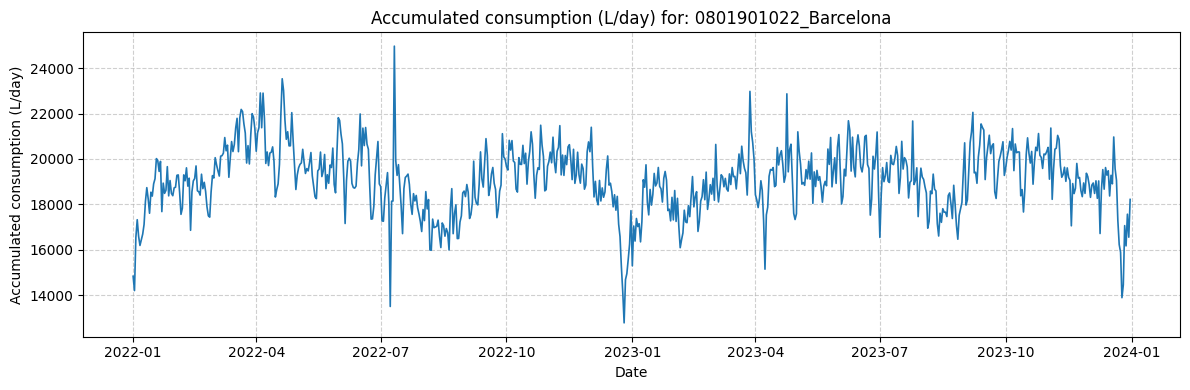

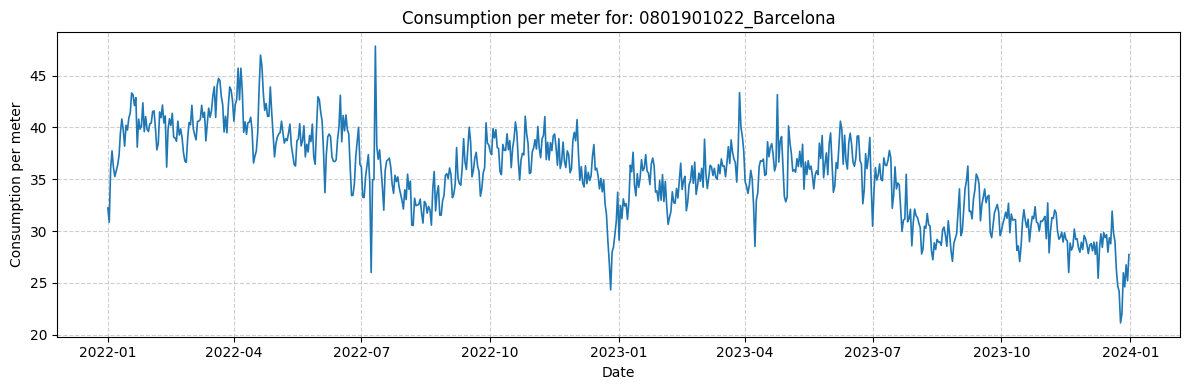

In [ ]:
# As we can see this approach is not correct, so we will try with means
plot_consumption_by_id(df, least_stationary_id)
plot_consumption_by_id(df, least_stationary_id, column='Consumption per meter')

In [ ]:
################################### Let's try working with means #################################

Top 5 series with the largest mean shift between years:
ID: 0801509004_Badalona, Mean shift: 75.06


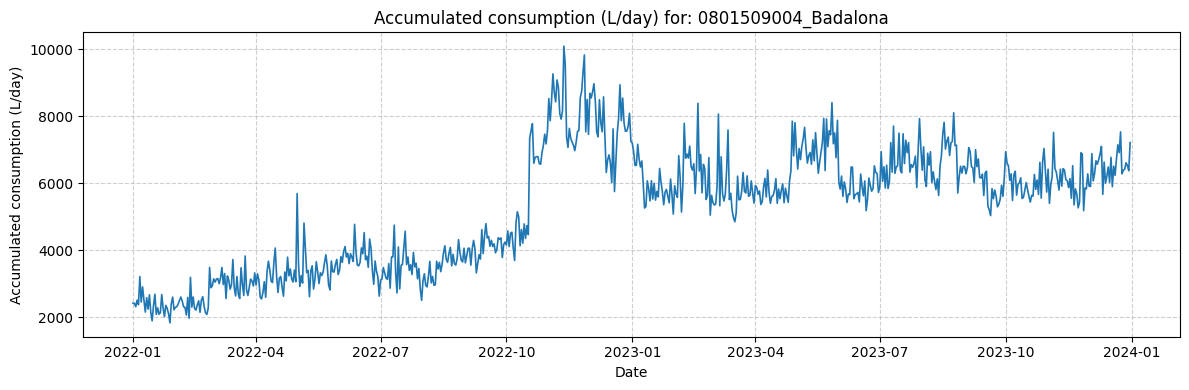

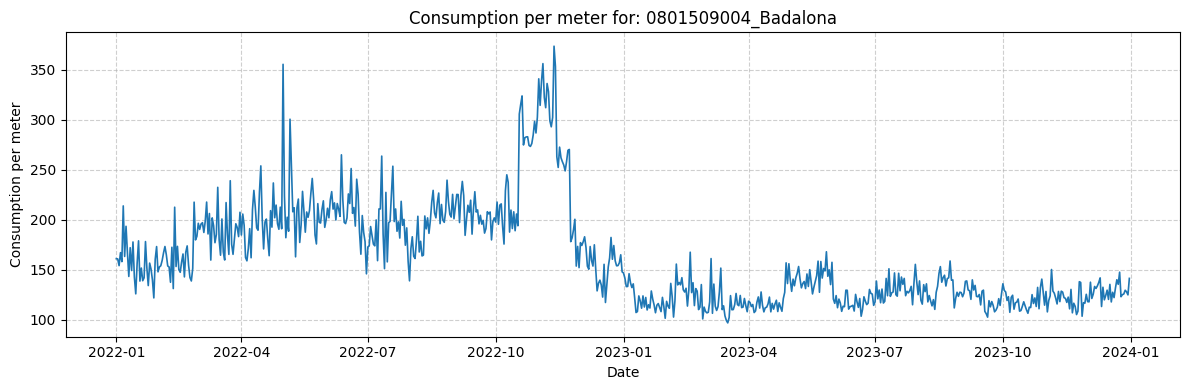

ID: 0801904056_Barcelona, Mean shift: 65.22


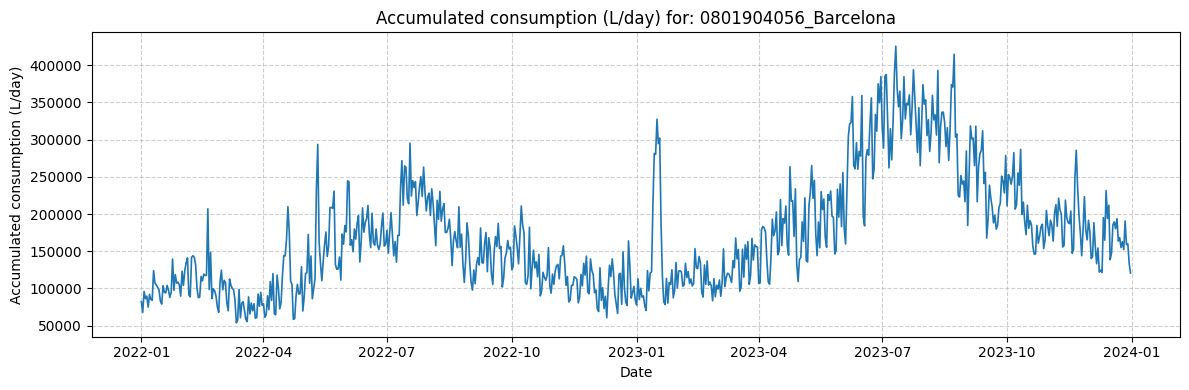

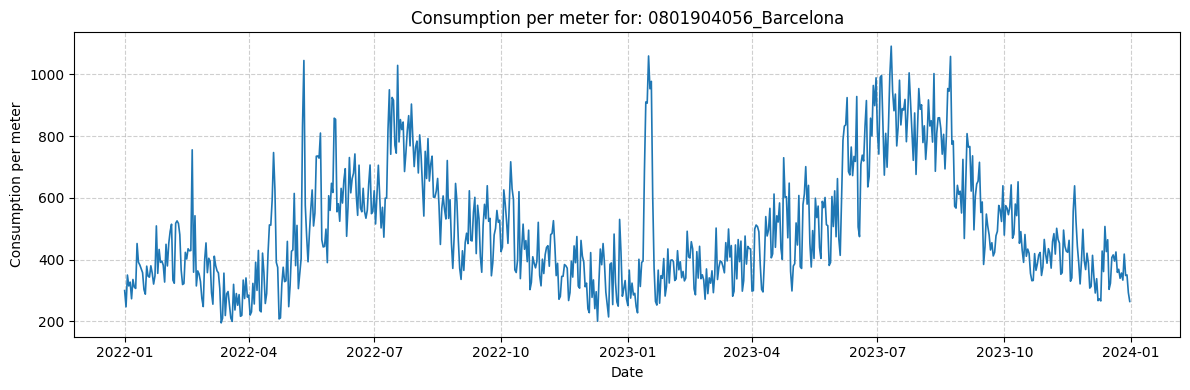

ID: 0801905004_Barcelona, Mean shift: 61.77


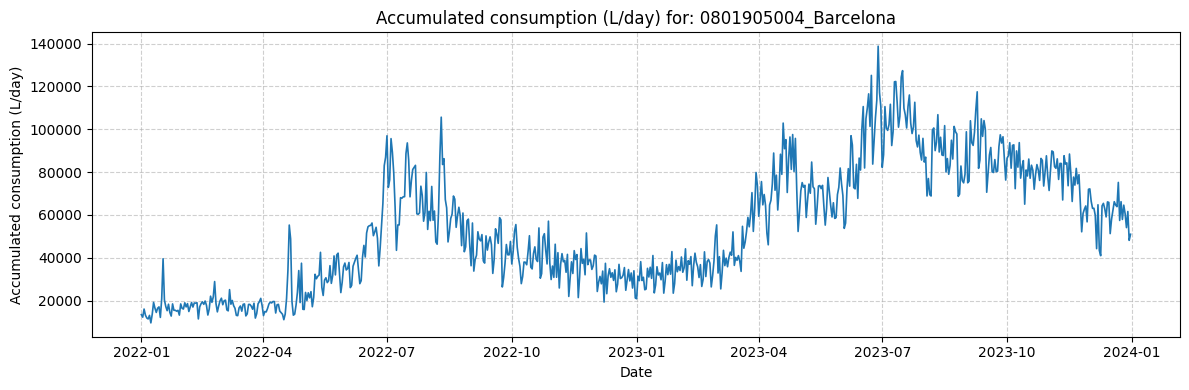

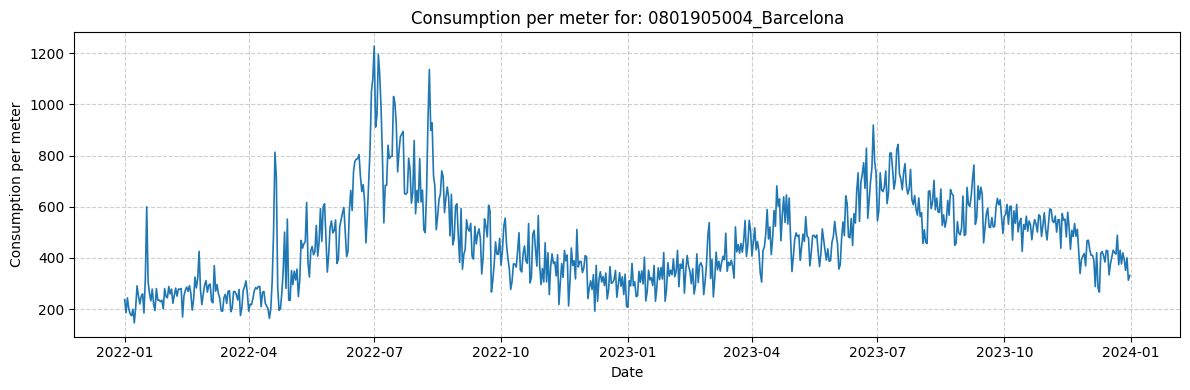

ID: 0820506001_Barcelona, Mean shift: 54.86


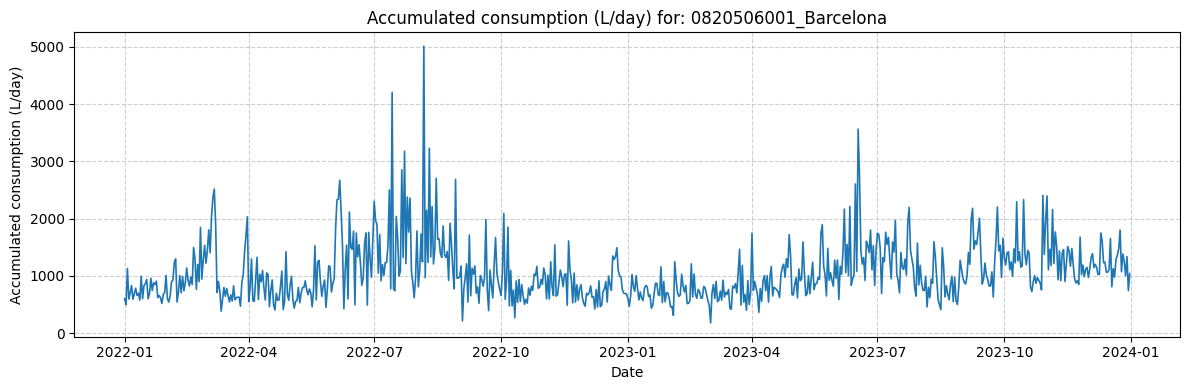

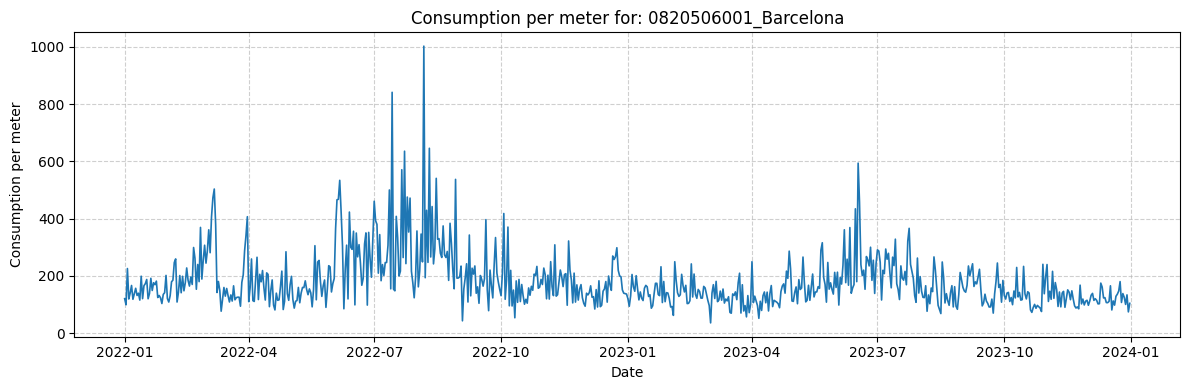

ID: 0801503006_Badalona, Mean shift: 48.60


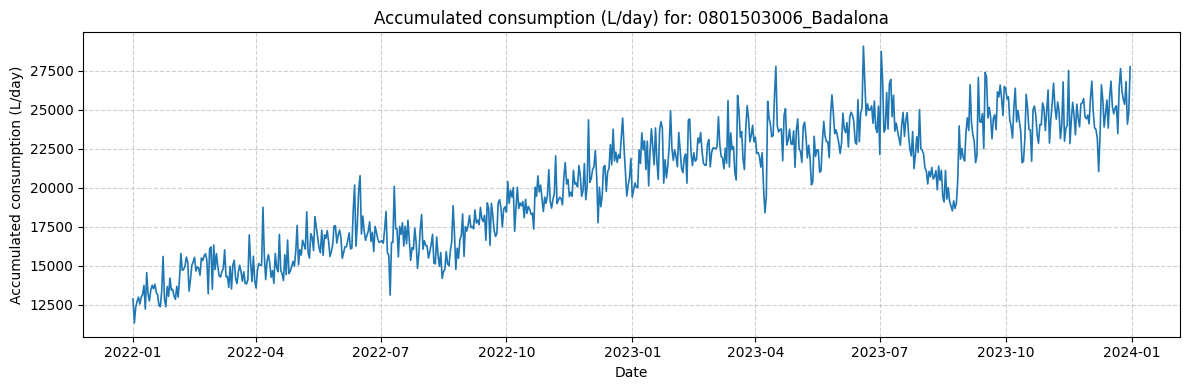

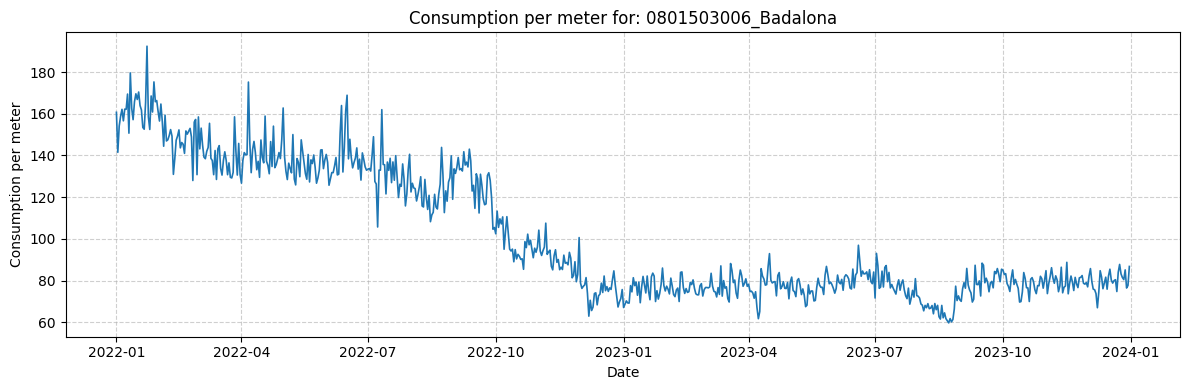

In [ ]:
# Add a Year column
df_cleaned2['Year'] = df_cleaned2['Date'].dt.year

mean_diffs = []

# Group by series ID
for series_id, group in df_cleaned2.groupby('id'):
    # Make sure we have both years
    if group['Year'].nunique() < 2:
        continue

    # Separate by year
    mean_2022 = group[group['Year'] == 2022]['Consumption per meter'].mean()
    mean_2023 = group[group['Year'] == 2023]['Consumption per meter'].mean()

    # Absolute difference
    diff = abs(mean_2022 - mean_2023)

    mean_diffs.append((series_id, diff))

# We by difference descending
mean_diffs_sorted = sorted(mean_diffs, key=lambda x: x[1], reverse=True)

# We take the top5
top_5 = mean_diffs_sorted[:5]

print("Top 5 series with the largest mean shift between years:")
for series_id, diff in top_5:
    print(f"ID: {series_id}, Mean shift: {diff:.2f}")
    plot_consumption_by_id(df, series_id)
    plot_consumption_by_id(df, series_id, column='Consumption per meter')


ID: 0810102032_Hospitalet, % mean change: 41.93%


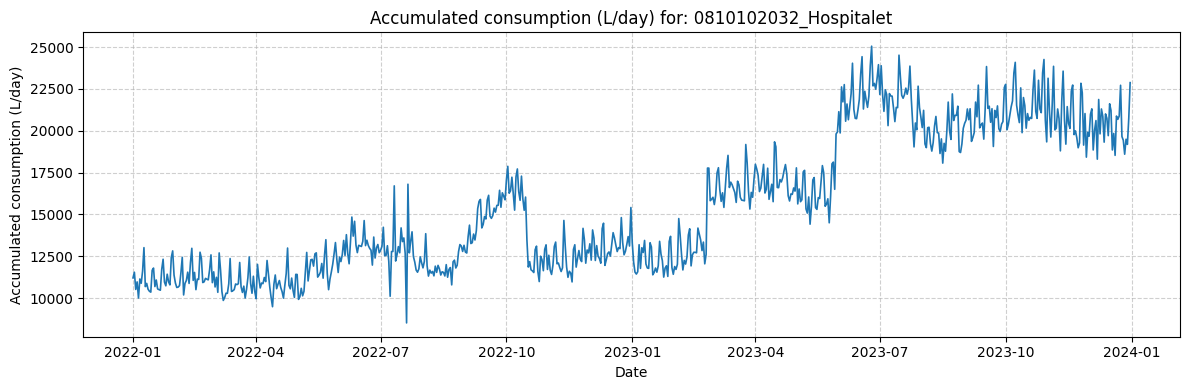

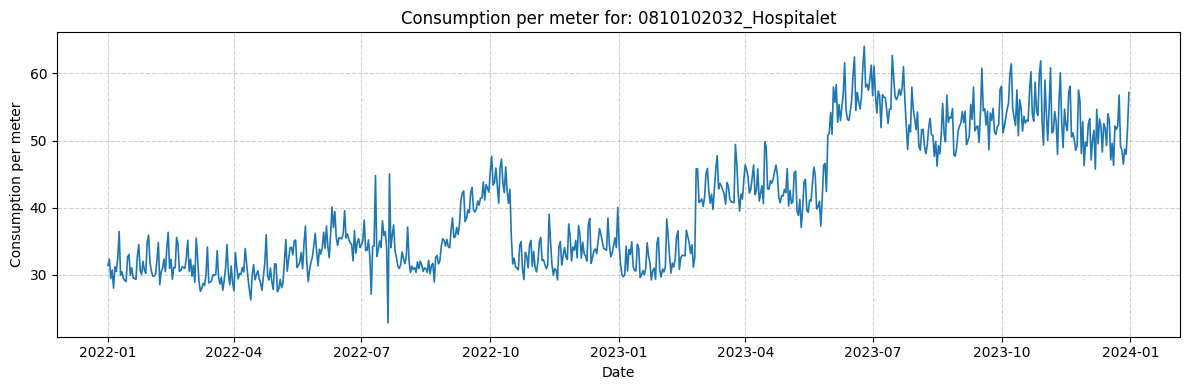

ID: 0801906022_Barcelona, % mean change: 41.61%


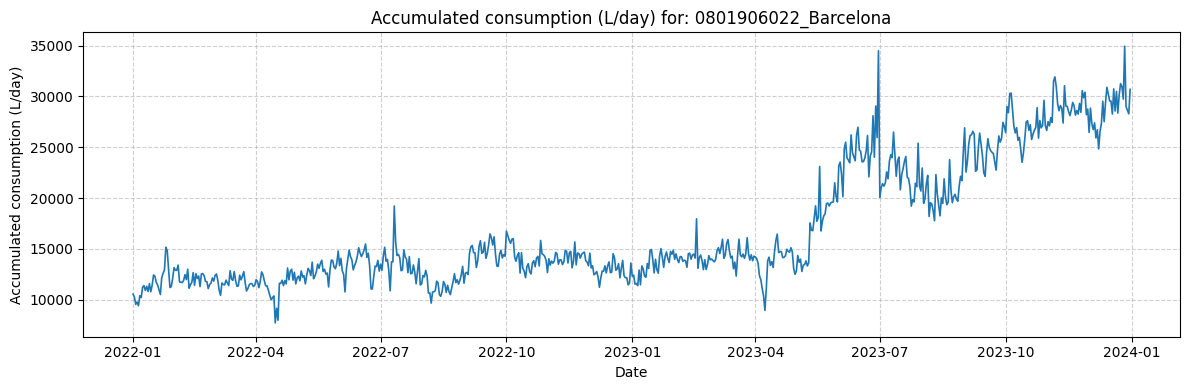

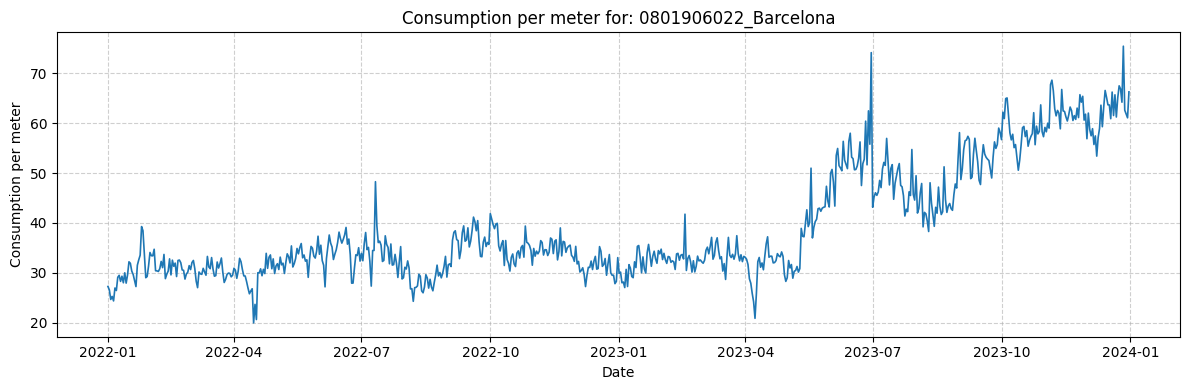

ID: 0810102009_Hospitalet, % mean change: 40.26%


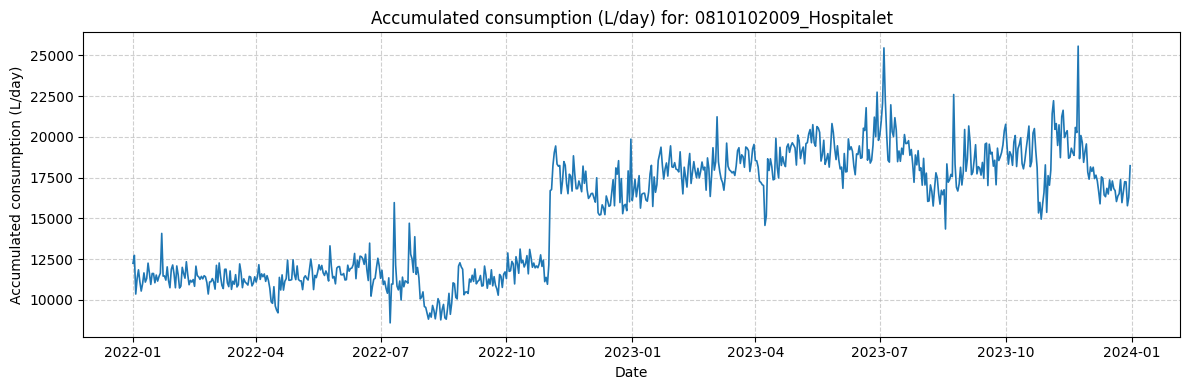

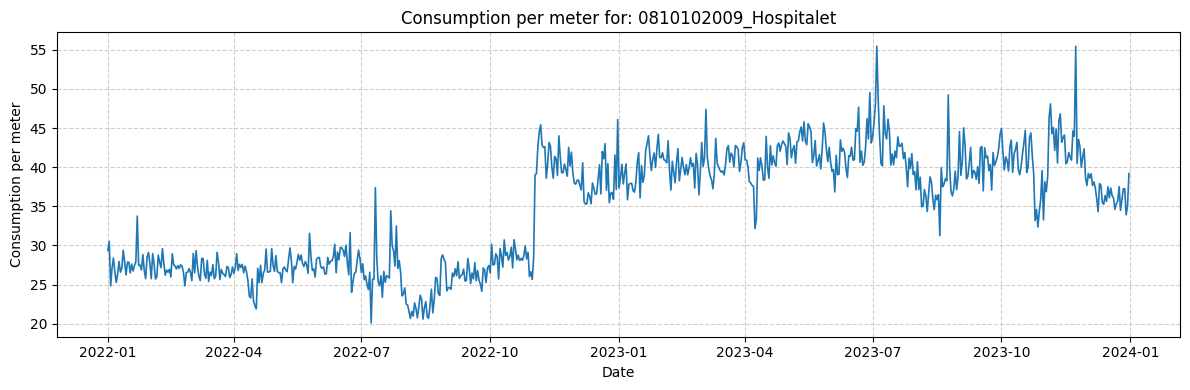

ID: 0801505007_Badalona, % mean change: 39.89%


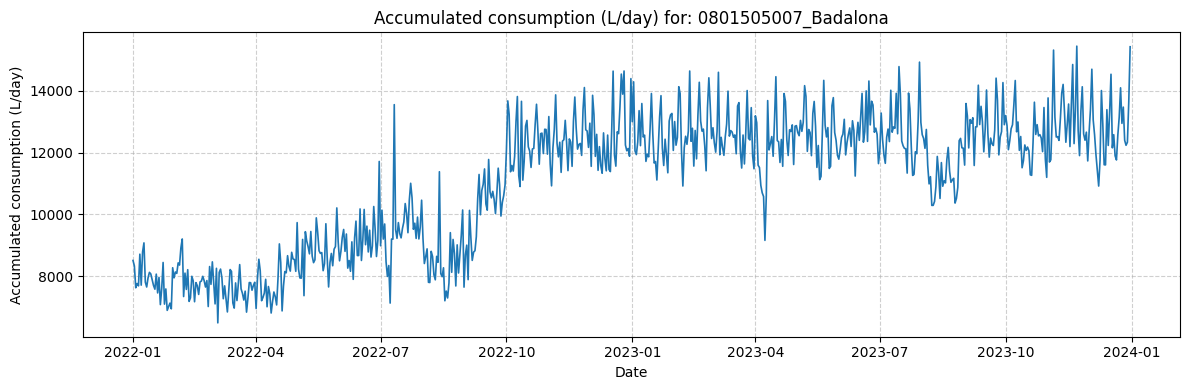

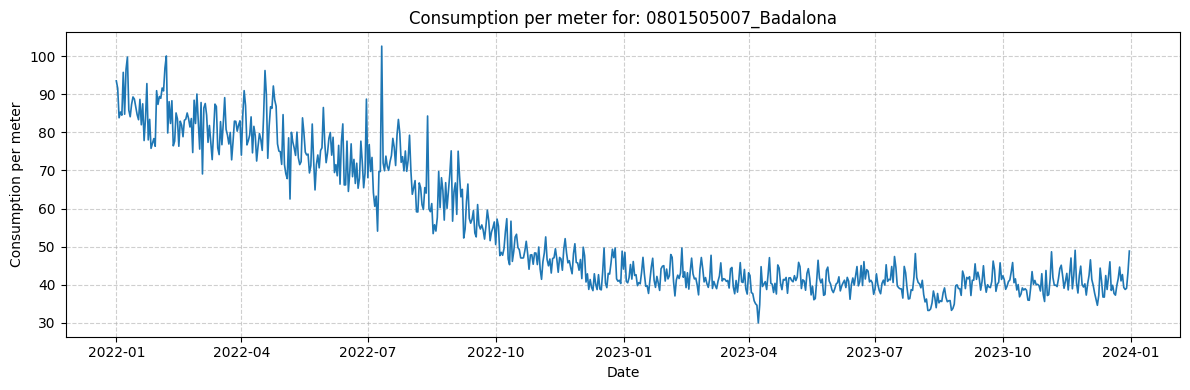

ID: 0801503006_Badalona, % mean change: 38.63%


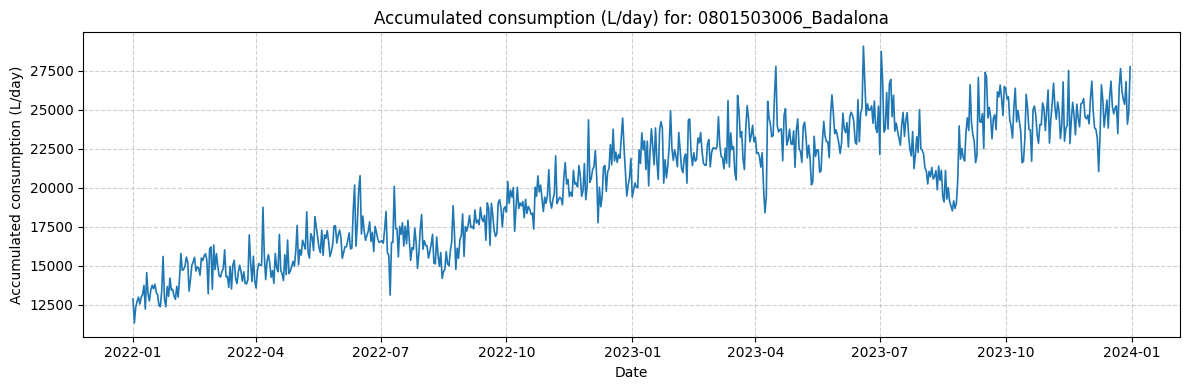

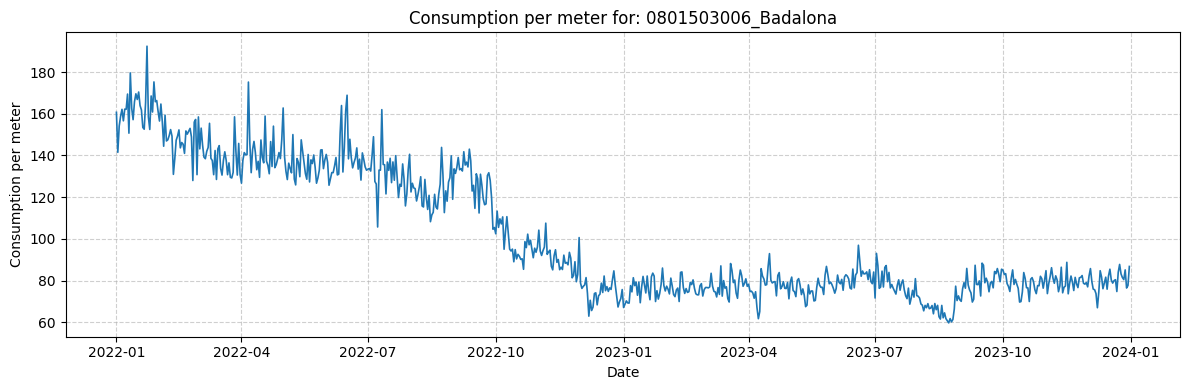

In [ ]:
# We see that working with absolute values is not working, so we will try with percentages which makes more sense when not all time series are in the same "scale"
mean_pct_diffs = []

for series_id, group in df_cleaned2.groupby('id'):
    if group['Year'].nunique() < 2:
        continue

    mean_2022 = group[group['Year'] == 2022]['Consumption per meter'].mean()
    mean_2023 = group[group['Year'] == 2023]['Consumption per meter'].mean()

    # Avoid divide-by-zero
    if mean_2022 == 0 or pd.isna(mean_2022) or pd.isna(mean_2023):
        continue

    pct_diff = abs((mean_2023 - mean_2022) / mean_2022) * 100
    mean_pct_diffs.append((series_id, pct_diff))

# Sort by percentage change
mean_pct_diffs_sorted = sorted(mean_pct_diffs, key=lambda x: x[1], reverse=True)

# Top 5 by percent difference
top_5_pct = mean_pct_diffs_sorted[:5]

# Plot them
for series_id, pct in top_5_pct:
    print(f"ID: {series_id}, % mean change: {pct:.2f}%")
    plot_consumption_by_id(df, series_id)
    plot_consumption_by_id(df, series_id, column='Consumption per meter')


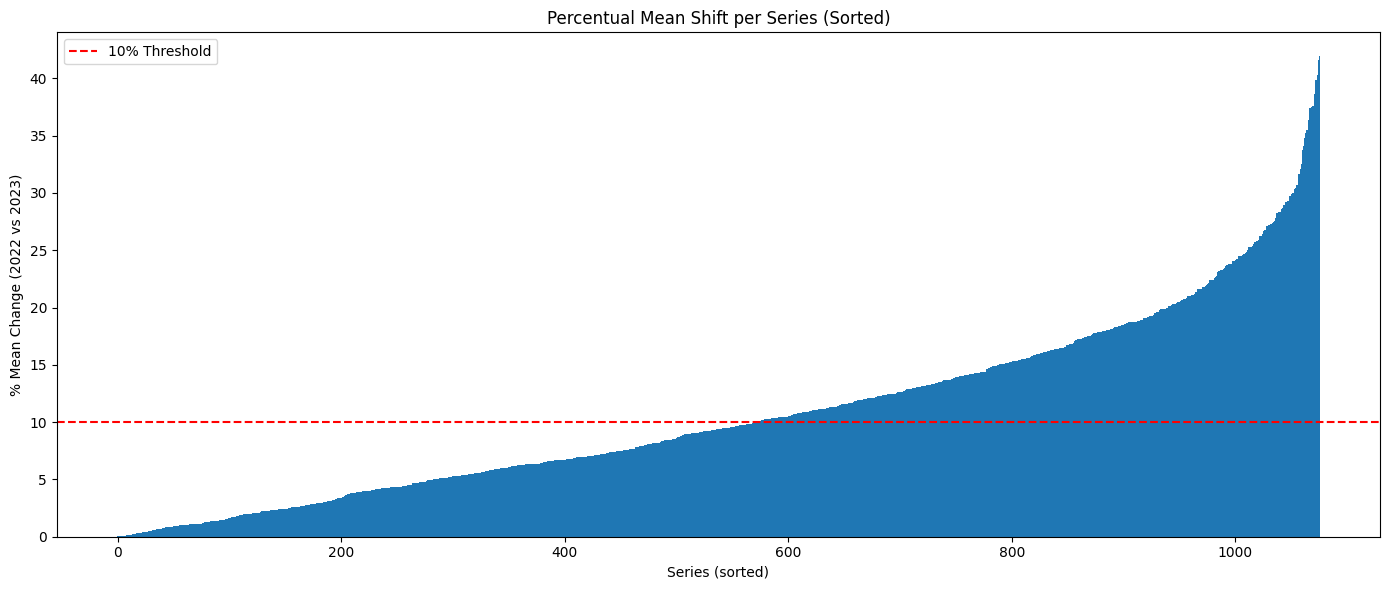

In [ ]:
# Assuming you already computed this earlier:
# mean_pct_diffs = [(series_id, pct_diff), ...]

# Sort by % difference
mean_pct_diffs_sorted = sorted(mean_pct_diffs, key=lambda x: x[1])

# Extract only percentage differences for plotting
pct_values = [x[1] for x in mean_pct_diffs_sorted]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(range(len(pct_values)), pct_values, width=1.0)
plt.axhline(y=10, color='red', linestyle='--', label='10% Threshold')
plt.xlabel("Series (sorted)")
plt.ylabel("% Mean Change (2022 vs 2023)")
plt.title("Percentual Mean Shift per Series (Sorted)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Count how many series exceed 50% difference
over_50 = sum(1 for _, pct in mean_pct_diffs if pct > 30)

print(f"Number of series with >30% mean change: {over_50} out of {len(mean_pct_diffs)}")


Number of series with >30% mean change: 25 out of 1076


In [ ]:
# Step 1: Sort by percentage difference (you already did this)
mean_pct_diffs_sorted = sorted(mean_pct_diffs, key=lambda x: x[1])

# Step 2: Calculate cutoff index for top 10%
cutoff_index = int(len(mean_pct_diffs_sorted) * 0.9)

# Step 3: Get the bottom 90% (keep only the most stable ones)
stable_ids = [series_id for series_id, _ in mean_pct_diffs_sorted[:cutoff_index]]

# Step 4: Filter your original DataFrame
df_cleaned3 = df_cleaned2[df_cleaned2['id'].isin(stable_ids)].copy()


In [ ]:
ids_cleaned =len(set(df_cleaned3['id'].unique()))
print(f"Number of time series after cleaning: {ids_cleaned}")

Number of time series after cleaning: 968


In [ ]:
# Let's convert to datetime and order
df_cleaned3['Date'] = pd.to_datetime(df_cleaned3['Date'])
df_cleaned3 = df_cleaned3.sort_values(['id', 'Date'])

In [ ]:
# Let's plot the 25 time series with the hightest increase of meters so we can check our cleaning is done


In [ ]:
# Now let's check the behaviour of the 25 time series with the most increased number of meters
# Get the first and last "Number of meters" for each id
first_meters = df_cleaned3.groupby('id').first()['Number of meters']
last_meters = df_cleaned3.groupby('id').last()['Number of meters']

# Compute the difference
increase = last_meters - first_meters

# Get the top 25 ids with the highest increase
top_25_increase = increase.sort_values(ascending=False).head(25)

print("Top 25 IDs with the highest increase in the number of meters:")
print(top_25_increase)

# Plot each of the top 25 time series
for idx in top_25_increase.index:
    print(f"\nPlotting for id: {idx} (Increase: {top_25_increase[idx]})")
    plot_consumption_by_id(df, idx)
    plot_consumption_by_id(df, idx, column='Consumption per meter')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# We save the df
df_cleaned3

id  District       Date       Use  Number of meters  \
0        0801501001_Badalona         1 2022-01-01  Domestic               250   
1        0801501001_Badalona         1 2022-01-02  Domestic               251   
2        0801501001_Badalona         1 2022-01-03  Domestic               251   
3        0801501001_Badalona         1 2022-01-04  Domestic               251   
4        0801501001_Badalona         1 2022-01-05  Domestic               251   
...                      ...       ...        ...       ...               ...   
938045  0819403001_Barcelona         3 2023-12-27  Domestic                41   
938046  0819403001_Barcelona         3 2023-12-28  Domestic                41   
938047  0819403001_Barcelona         3 2023-12-29  Domestic                41   
938048  0819403001_Barcelona         3 2023-12-30  Domestic                41   
938049  0819403001_Barcelona         3 2023-12-31  Domestic                41   

        Accumulated consumption (L/day)  Consumption per meter  Year  
0                                 16242                  64.97  2022  
1                                 17477                  69.63  2022  
2                                 16540                  65.90  2022  
3                                 17153                  68.34  2022  
4                                 18619                  74.18  2022  
...                                 ...                    ...   ...  
938045                              254                   6.20  2023  
938046                              246                   6.00  2023  
938047                              229                   5.59  2023  
938048                              258                   6.29  2023  
938049                              298                   7.27  2023  

[706640 rows x 8 columns]

In [ ]:
# Save the DataFrame as a CSV file (already sorted)
df_cleaned3.to_csv('/content/drive/MyDrive/Colab Notebooks/TFG/data/01_datasets/df_domestic_cleaned_final.csv', index=False)

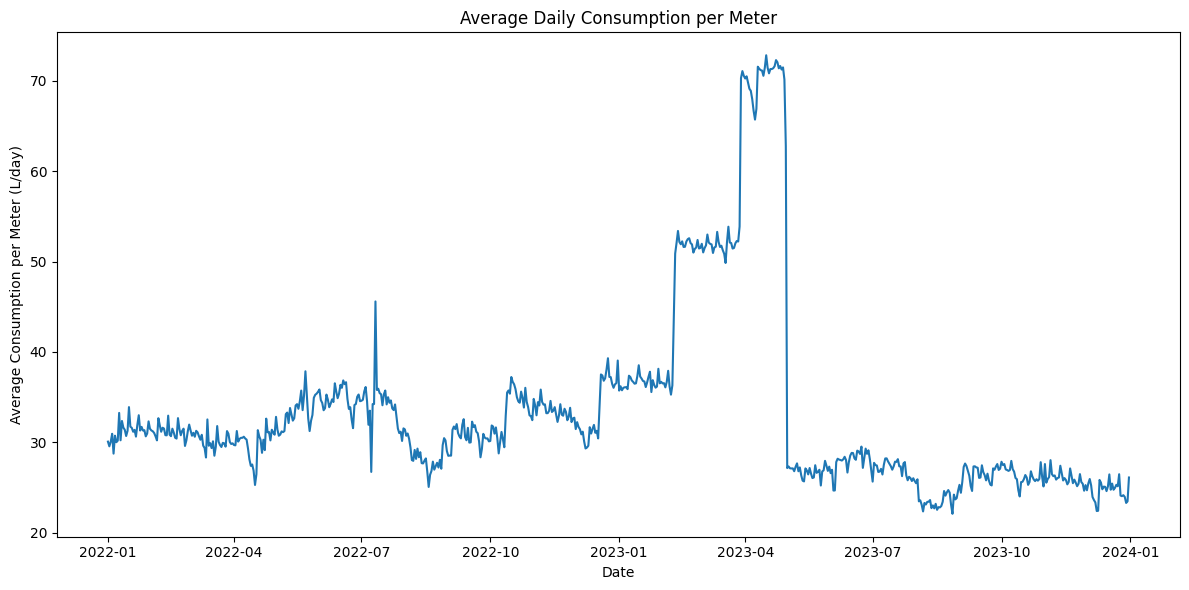

In [ ]:
# DO THIS BEFORE AND AFTER THE CLEANING

# Assuming your DataFrame is already named df and loaded

# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and calculate the mean Consumption per meter
daily_avg = df.groupby('Date')['Consumption per meter'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values)
plt.xlabel('Date')
plt.ylabel('Average Consumption per Meter (L/day)')
plt.title('Average Daily Consumption per Meter')
plt.tight_layout()
plt.show()


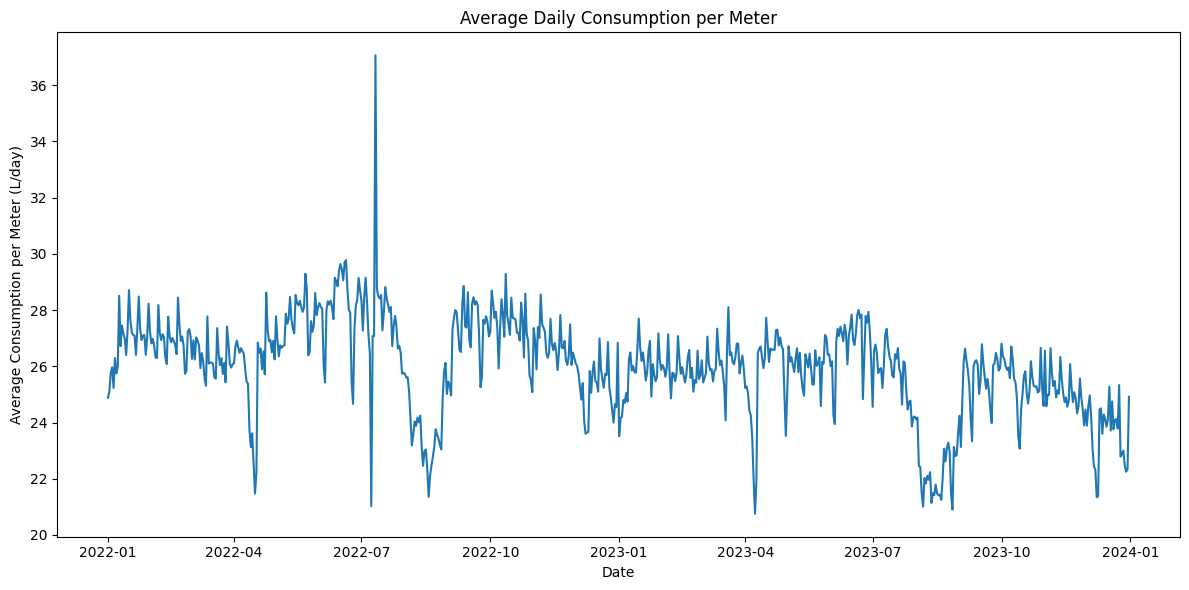

In [ ]:
# FINAL DATASET CLEANED

# Group by Date and calculate the mean Consumption per meter
daily_avg = df_cleaned3.groupby('Date')['Consumption per meter'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values)
plt.xlabel('Date')
plt.ylabel('Average Consumption per Meter (L/day)')
plt.title('Average Daily Consumption per Meter')
plt.tight_layout()
plt.show()


In [ ]:
# We can see an abnormal pattern in July in many counters which is reflected in the global mean of all counters, we have to take care of it
# Let's try to localize these abnormal consumption values

# Ensure 'Date' is datetime
daily_avg.index = pd.to_datetime(daily_avg.index)

# Focus on July 2022
july_avg = daily_avg['2022-07']

# Compute the day-to-day difference
july_diff = july_avg.diff()

# Find the largest drop and spike
sharpest_drop_day = july_diff.idxmin()
sharpest_spike_day = july_diff.idxmax()

print("Sharpest drop in July 2022:", sharpest_drop_day.date())
print("Sharpest spike in July 2022:", sharpest_spike_day.date())




Sharpest drop in July 2022: 2022-07-12
Sharpest spike in July 2022: 2022-07-11


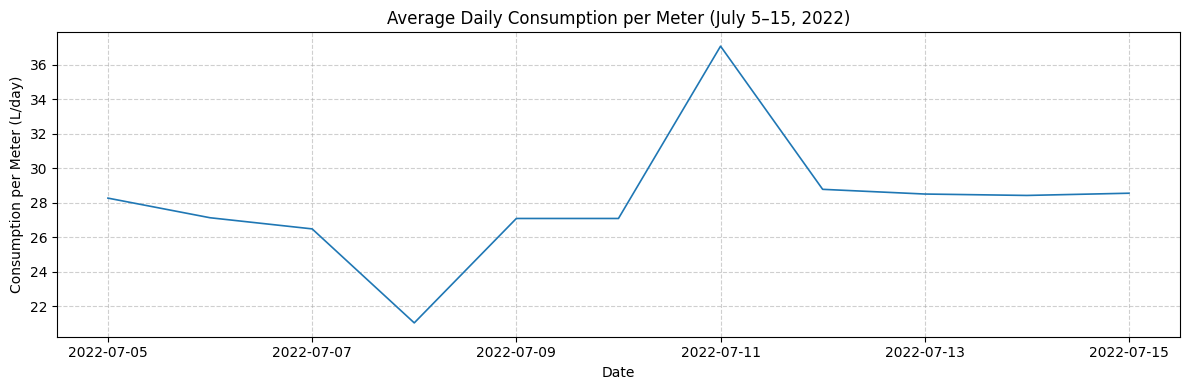

In [ ]:
# Ensure 'Date' is datetime
df_cleaned3['Date'] = pd.to_datetime(df_cleaned3['Date'])

# Group by Date to get the daily average
daily_avg = df_cleaned3.groupby('Date')['Consumption per meter'].mean().reset_index()

# Filter the range 2022-07-05 to 2022-07-15
mask = (daily_avg['Date'] >= '2022-07-05') & (daily_avg['Date'] <= '2022-07-15')
plot_df = daily_avg[mask].sort_values('Date')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(plot_df['Date'], plot_df['Consumption per meter'], linestyle='-', linewidth=1.2)
plt.title('Average Daily Consumption per Meter (July 5–15, 2022)')
plt.xlabel('Date')
plt.ylabel('Consumption per Meter (L/day)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# We know the critical days are 08/07 - 11/07
# Ensure Date is datetime
df_cleaned3['Date'] = pd.to_datetime(df_cleaned3['Date'])

# Filter to July 2022
july_df = df_cleaned3[(df_cleaned3['Date'] >= '2022-07-01') & (df_cleaned3['Date'] <= '2022-07-31')].copy()

# Create masks for the dates of interest
date_min = pd.Timestamp('2022-07-08')
date_max = pd.Timestamp('2022-07-11')

# Function to check if minima and maxima occur on specific dates
def check_extremes(group):
    min_day = group.loc[group['Consumption per meter'].idxmin(), 'Date']
    max_day = group.loc[group['Consumption per meter'].idxmax(), 'Date']
    return pd.Series({
        'min_is_08': min_day == date_min,
        'max_is_11': max_day == date_max
    })

# Apply to each ID
# Updated to exclude grouping column and avoid DeprecationWarning
extreme_flags = (
    july_df
    .groupby('id', group_keys=False)
    .apply(check_extremes, include_groups=False)
)


# Calculate percentages
pct_min_08 = 100 * extreme_flags['min_is_08'].mean()
pct_max_11 = 100 * extreme_flags['max_is_11'].mean()

print(f"Percentage of series with a minimum on 08/07: {pct_min_08:.2f}%")
print(f"Percentage of series with a maximum on 11/07: {pct_max_11:.2f}%")


Percentage of series with a minimum on 08/07: 88.33%
Percentage of series with a maximum on 11/07: 92.67%


In [ ]:
# Asegúrate de que la columna "Date" sea datetime
df_cleaned3["Date"] = pd.to_datetime(df_cleaned3["Date"])

# Crear una copia
df_cleaned_modified = df_cleaned3.copy()

# Definir el rango de fechas a modificar
target_dates = pd.date_range("2022-07-08", "2022-07-11")

# Función para obtener la media de los días +/-7 y +/-14
def get_mean_for_surrounding_dates(sub_df, target_date):
    relevant_dates = [target_date + pd.Timedelta(days=offset) for offset in [-14, -7, 7, 14]]
    values = sub_df[sub_df["Date"].isin(relevant_dates)]["Consumption per meter"]
    if len(values) > 0:
        return values.mean()
    else:
        return None  # o sub_df.loc[sub_df["Date"] == target_date, "Consumption per meter"].values[0]

# Aplicar la lógica para cada id
for unique_id in df_cleaned_modified["id"].unique():
    sub_df = df_cleaned_modified[df_cleaned_modified["id"] == unique_id]
    for date in target_dates:
        mask = (df_cleaned_modified["id"] == unique_id) & (df_cleaned_modified["Date"] == date)
        mean_value = get_mean_for_surrounding_dates(sub_df, date)
        if pd.notnull(mean_value):
            df_cleaned_modified.loc[mask, "Consumption per meter"] = mean_value


In [ ]:
import pandas as pd

# Asegúrate de que la columna "Date" sea datetime
df_cleaned3["Date"] = pd.to_datetime(df_cleaned3["Date"])

# Crear una copia
df_modified = df_cleaned3.copy()

# Filtrar las fechas objetivo
target_dates = pd.date_range("2022-07-08", "2022-07-11")
df_target = df_modified[df_modified["Date"].isin(target_dates)]

# Crear un DataFrame para cada desfase temporal y renombrar las columnas
offsets = [-14, -7, 7, 14]
merged = df_target[["id", "Date"]].copy()

for offset in offsets:
    temp = df_modified[["id", "Date", "Consumption per meter"]].copy()
    temp["Date"] = temp["Date"] - pd.Timedelta(days=offset)
    temp = temp.rename(columns={"Consumption per meter": f"offset_{offset}"})
    merged = merged.merge(temp, on=["id", "Date"], how="left")

# Calcular la media de las columnas desplazadas
offset_cols = [f"offset_{o}" for o in offsets]
merged["mean_consumption"] = merged[offset_cols].mean(axis=1)

# Aplicar los nuevos valores en df_modified
df_modified.set_index(["id", "Date"], inplace=True)
for _, row in merged.iterrows():
    df_modified.loc[(row["id"], row["Date"]), "Consumption per meter"] = row["mean_consumption"]
df_modified.reset_index(inplace=True)


In [ ]:
df_cleaned_modified

id  District       Date       Use  Number of meters  \
0        0801501001_Badalona         1 2022-01-01  Domestic               250   
1        0801501001_Badalona         1 2022-01-02  Domestic               251   
2        0801501001_Badalona         1 2022-01-03  Domestic               251   
3        0801501001_Badalona         1 2022-01-04  Domestic               251   
4        0801501001_Badalona         1 2022-01-05  Domestic               251   
...                      ...       ...        ...       ...               ...   
938045  0819403001_Barcelona         3 2023-12-27  Domestic                41   
938046  0819403001_Barcelona         3 2023-12-28  Domestic                41   
938047  0819403001_Barcelona         3 2023-12-29  Domestic                41   
938048  0819403001_Barcelona         3 2023-12-30  Domestic                41   
938049  0819403001_Barcelona         3 2023-12-31  Domestic                41   

        Accumulated consumption (L/day)  Consumption per meter  Year  
0                                 16242                  64.97  2022  
1                                 17477                  69.63  2022  
2                                 16540                  65.90  2022  
3                                 17153                  68.34  2022  
4                                 18619                  74.18  2022  
...                                 ...                    ...   ...  
938045                              254                   6.20  2023  
938046                              246                   6.00  2023  
938047                              229                   5.59  2023  
938048                              258                   6.29  2023  
938049                              298                   7.27  2023  

[706640 rows x 8 columns]

In [ ]:
df_modified

id       Date  District       Use  Number of meters  \
0        0801501001_Badalona 2022-01-01         1  Domestic               250   
1        0801501001_Badalona 2022-01-02         1  Domestic               251   
2        0801501001_Badalona 2022-01-03         1  Domestic               251   
3        0801501001_Badalona 2022-01-04         1  Domestic               251   
4        0801501001_Badalona 2022-01-05         1  Domestic               251   
...                      ...        ...       ...       ...               ...   
706635  0819403001_Barcelona 2023-12-27         3  Domestic                41   
706636  0819403001_Barcelona 2023-12-28         3  Domestic                41   
706637  0819403001_Barcelona 2023-12-29         3  Domestic                41   
706638  0819403001_Barcelona 2023-12-30         3  Domestic                41   
706639  0819403001_Barcelona 2023-12-31         3  Domestic                41   

        Accumulated consumption (L/day)  Consumption per meter  Year  
0                                 16242                  64.97  2022  
1                                 17477                  69.63  2022  
2                                 16540                  65.90  2022  
3                                 17153                  68.34  2022  
4                                 18619                  74.18  2022  
...                                 ...                    ...   ...  
706635                              254                   6.20  2023  
706636                              246                   6.00  2023  
706637                              229                   5.59  2023  
706638                              258                   6.29  2023  
706639                              298                   7.27  2023  

[706640 rows x 8 columns]

In [ ]:
import pandas as pd

# Make sure both DataFrames have datetime 'Date'
df_cleaned3['Date'] = pd.to_datetime(df_cleaned3['Date'])
df_cleaned_modified['Date'] = pd.to_datetime(df_cleaned_modified['Date'])

# Target dates that were corrected
fixed_dates = pd.date_range('2022-07-08', '2022-07-11')

# Filter rows from both DataFrames
original = df_cleaned3[df_cleaned3['Date'].isin(fixed_dates)].copy()
corrected = df_cleaned_modified[df_cleaned_modified['Date'].isin(fixed_dates)].copy()

# Merge to compare
comparison = original.merge(
    corrected[['id', 'Date', 'Consumption per meter']],
    on=['id', 'Date'],
    how='left',
    suffixes=('_original', '_corrected')
)

# Calculate difference
comparison['Difference'] = (
    comparison['Consumption per meter_corrected'] - comparison['Consumption per meter_original']
)

# Show only rows where the value actually changed
changed_rows = comparison[comparison['Difference'].abs() > 1e-6]

# Display the top 10 changed rows
print(changed_rows.head(10))


                    id  District       Date       Use  Number of meters  \
0  0801501001_Badalona         1 2022-07-08  Domestic               295   
1  0801501001_Badalona         1 2022-07-09  Domestic               295   
2  0801501001_Badalona         1 2022-07-10  Domestic               295   
3  0801501001_Badalona         1 2022-07-11  Domestic               295   
4  0801501002_Badalona         1 2022-07-08  Domestic               254   
5  0801501002_Badalona         1 2022-07-09  Domestic               254   
6  0801501002_Badalona         1 2022-07-10  Domestic               254   
7  0801501002_Badalona         1 2022-07-11  Domestic               255   

   Accumulated consumption (L/day)  Consumption per meter_original  Year  \
0                            15331                           51.97  2022   
1                            21353                           72.38  2022   
2                            21355                           72.39  2022   
3                   

In [ ]:
len(changed_rows)

8

In [ ]:
df_cleaned_modified

id  District       Date       Use  Number of meters  \
0        0801501001_Badalona         1 2022-01-01  Domestic               250   
1        0801501001_Badalona         1 2022-01-02  Domestic               251   
2        0801501001_Badalona         1 2022-01-03  Domestic               251   
3        0801501001_Badalona         1 2022-01-04  Domestic               251   
4        0801501001_Badalona         1 2022-01-05  Domestic               251   
...                      ...       ...        ...       ...               ...   
938045  0819403001_Barcelona         3 2023-12-27  Domestic                41   
938046  0819403001_Barcelona         3 2023-12-28  Domestic                41   
938047  0819403001_Barcelona         3 2023-12-29  Domestic                41   
938048  0819403001_Barcelona         3 2023-12-30  Domestic                41   
938049  0819403001_Barcelona         3 2023-12-31  Domestic                41   

        Accumulated consumption (L/day)  Consumption per meter  Year  
0                                 16242                15.8025  2022  
1                                 17477                13.6775  2022  
2                                 16540               155.1400  2022  
3                                 17153               108.1600  2022  
4                                 18619                41.7450  2022  
...                                 ...                    ...   ...  
938045                              254                 6.2000  2023  
938046                              246                 6.0000  2023  
938047                              229                 5.5900  2023  
938048                              258                 6.2900  2023  
938049                              298                 7.2700  2023  

[706640 rows x 8 columns]

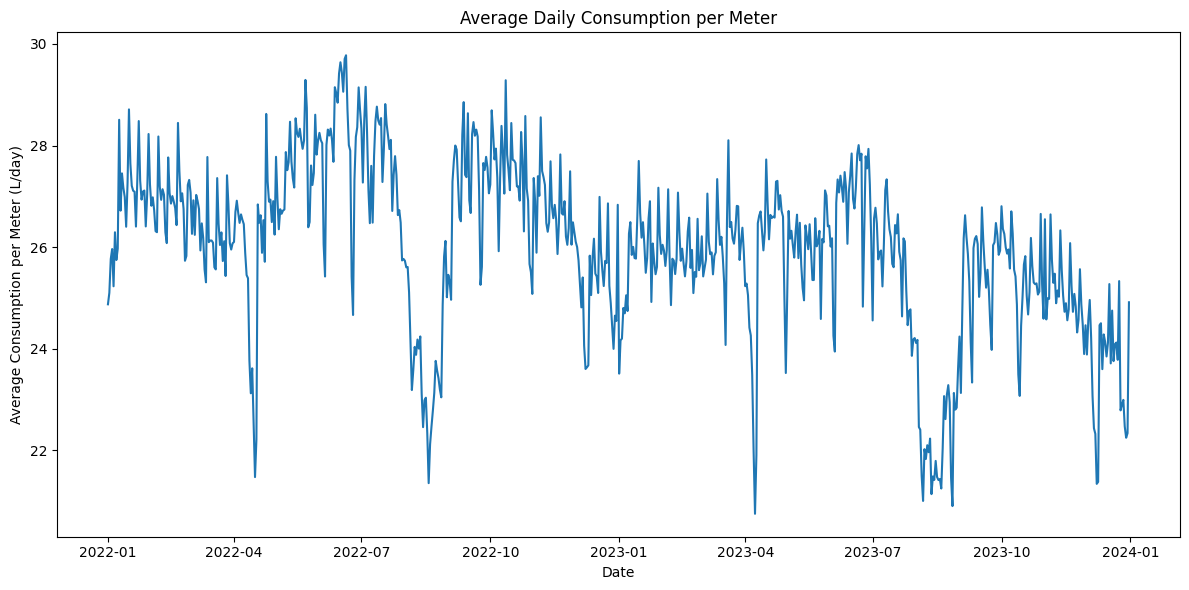

In [ ]:
# FINAL DATASET CLEANED
# Assuming your DataFrame is already named df and loaded

# Group by Date and calculate the mean Consumption per meter
daily_avg = df_modified.groupby('Date')['Consumption per meter'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values)
plt.xlabel('Date')
plt.ylabel('Average Consumption per Meter (L/day)')
plt.title('Average Daily Consumption per Meter')
plt.tight_layout()
plt.show()


In [ ]:
df_modified.to_csv('/content/drive/MyDrive/Colab Notebooks/TFG/data/01_datasets/df_domestic_cleaned_modified.csv', index=False)

In [ ]:
from darts import TimeSeries
# TREND AND SEASONALITY ANALYSIS
# Let's keep working with this time series
# Make sure 'Date' is datetime
df_cleaned3['Date'] = pd.to_datetime(df_cleaned3['Date'])

# Pick one meter (you can change the ID)
meter_id = "0801910071_Barcelona"
df_meter = df_cleaned3[df_cleaned3['id'] == meter_id].sort_values('Date')

# Create Darts TimeSeries for 'Consumption per meter'
ts = TimeSeries.from_dataframe(df_meter, time_col='Date', value_cols='Consumption per meter')

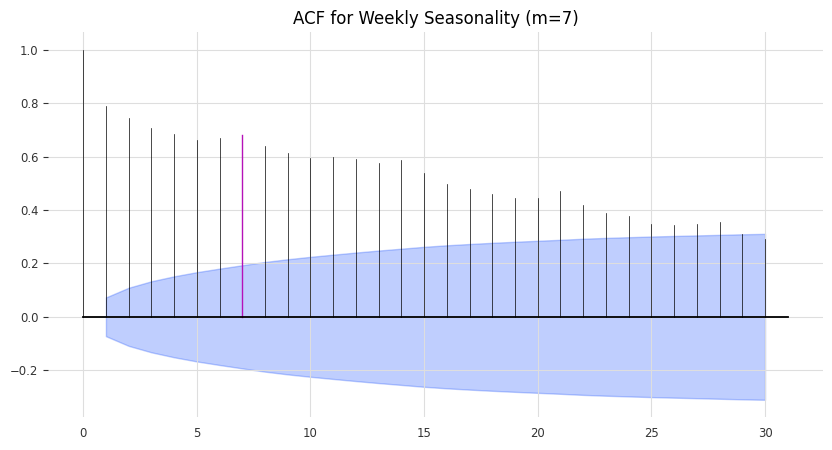

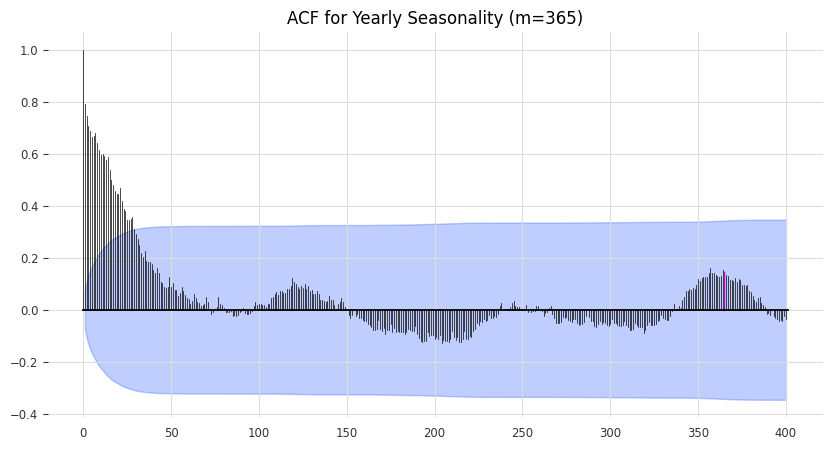

In [ ]:
from darts.utils.statistics import plot_acf
import matplotlib.pyplot as plt

# Weekly ACF
plot_acf(ts, m=7, alpha=0.05, max_lag=30)
plt.title("ACF for Weekly Seasonality (m=7)")
plt.show()

# Yearly ACF
plot_acf(ts, m=365, alpha=0.05, max_lag=400)
plt.title("ACF for Yearly Seasonality (m=365)")
plt.show()

In [ ]:
from darts.utils.statistics import check_seasonality

for m in [7, 30, 31, 365]:
    try:
        is_seasonal, period = check_seasonality(ts, m=m, alpha=0.05, max_lag=max(m + 1, 400))
        if is_seasonal:
            print(f"Seasonality detected at period = {period} (m = {m})")
        else:
            print(f"No seasonality detected at m = {m}")
    except ValueError as e:
        print(f"Skipped m = {m} due to error: {e}")


✅ Seasonality detected at period = 7 (m = 7)
❌ No seasonality detected at m = 30
❌ No seasonality detected at m = 31
❌ No seasonality detected at m = 365


In [ ]:
from darts import TimeSeries
from darts.utils.statistics import check_seasonality

unique_meters = df['id'].unique()

for meter_id in unique_meters[:25]:  # Adjust range as needed
    df_meter = df[df['id'] == meter_id].sort_values('Date')

    # Skip if not enough data
    if len(df_meter) < 370:
        print(f"{meter_id}: Skipped (not enough data)")
        continue

    try:
        ts = TimeSeries.from_dataframe(df_meter, time_col='Date', value_cols='Consumption per meter')
        is_seasonal, period = check_seasonality(ts, m=365, alpha=0.05, max_lag=400)

        if is_seasonal:
            print(f"{meter_id}: Yearly seasonality detected (m=365)")
        else:
            print(f"{meter_id}: No yearly seasonality detected")

    except Exception as e:
        print(f"{meter_id}: Error: {e}")


0801501001_Badalona: ❌ No yearly seasonality detected
0801501002_Badalona: ❌ No yearly seasonality detected
0801501003_Badalona: ❌ No yearly seasonality detected
0801501004_Badalona: ❌ No yearly seasonality detected
0801501005_Badalona: ❌ No yearly seasonality detected
0801501007_Badalona: ❌ No yearly seasonality detected
0801502003_Badalona: ❌ No yearly seasonality detected
0801502004_Badalona: ❌ No yearly seasonality detected
0801502007_Badalona: ❌ No yearly seasonality detected
0801502008_Badalona: ❌ No yearly seasonality detected
0801502010_Badalona: ❌ No yearly seasonality detected
0801502011_Badalona: ❌ No yearly seasonality detected
0801502012_Badalona: ❌ No yearly seasonality detected
0801502015_Badalona: ❌ No yearly seasonality detected
0801503001_Badalona: ❌ No yearly seasonality detected
0801503003_Badalona: ❌ No yearly seasonality detected
0801503004_Badalona: ❌ No yearly seasonality detected
0801503006_Badalona: ❌ No yearly seasonality detected
0801503007_Badalona: ❌ No ye